# L01: Intro

This first section is about the intro exercise. These exercises is about settings and how we can work with ML in python. By the end of this exercise we have tried out different types of models, tweeked parameters and getted to know some basic elements in machine learning. 

The data we are using is about comparing peoples life satisfaction and GDP per capita.

The first section of code unsures that the jupyter notebook is able to run no matter the version of python. Futhermore is numpy and matplotlib imported to make sure is works as well.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # ITMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [2]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
! dir

print("\nOK")

 Volume in drive C is Windows
 Volume Serial Number is B656-409B

 Directory of c:\GitHub\MAL\ASS01

21-02-2021  10:11    <DIR>          .
21-02-2021  10:11    <DIR>          ..
21-02-2021  10:29         1.118.966 ass01.ipynb
21-02-2021  10:11    <DIR>          Data
21-02-2021  10:11    <DIR>          libdummymodule
21-02-2021  10:11    <DIR>          libitmal
               1 File(s)      1.118.966 bytes
               5 Dir(s)  276.252.471.296 bytes free

OK


### Code example 1-1 

In this section the data is imported, preprocessed and plotted. We are just running the codes..

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


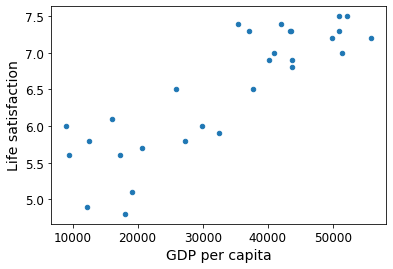

[[5.96242338]]
OK


In [4]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"ITMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

### ITMAL

The following section of code is for plotting the result of the linear regression.

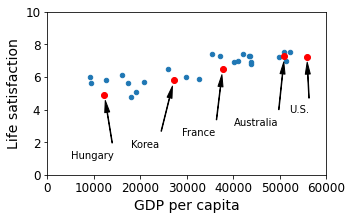

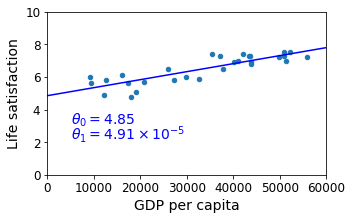

OK


In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

In the above sections of code a model has been made, trained with the data and a single value has been predicted. The model is build on the concept of supervised learning, which mean when the model are trained we are supervising the model with correct answers to the data. The model is a linear regressor, which means it will predict values by a linear line as you can see in the grapha above. 

### Qa) Parameters ($\theta$) and the score ($R^2$)

**In the linear regression model there is used som parameters called $\theta$, but how can these parameters be extracted from the model via the python attributes?**

$\theta_0$ can be seen on the figure as 4.85. As the model is a linear regression this is equivalent to our value b, when the first order polynomial is in the form $y = a\cdot x + b$. Furthermore $\theta_1 = 4.91\times 10^{-5}$ is the constant a.

**When we want to evaluate the model we are trying to find a score. One kind of score is $R^2$. What will this score say about the model? What is it's maximum and minimum? Is a low or high score best?**

$R^2$ (which is used as a score for the linear regression model) describes the how good the model is at predicting the correct output based on a given input.

*What are the minimum and maximum values for $R^2~$?* <br>
The best possible score for a linear regression model to achieve is $R^2$ = 1.0. I previously believed the worst was 0.0, but the Scikit-learn documentation says that a negative $R^2$ is possible.

*Is it best to have a low $R^2$ score or a high $R^2$ score? This means, is $R^2$ a loss/cost function or a function that measures of fitness/goodness?*<br>
It is better to have a higher $R^2$ score, which makes it a function that meassure fitness/goodness. The higher the better.


In [6]:
# Code answer Qa
t0 = lin1.predict([[0]])
t1 = lin1.coef_
print(f"\u03B8_0 = {t0}, \u03B8_1 = {t1}")

score = lin1.score(X,y)

θ_0 = [[4.8530528]], θ_1 = [[4.91154459e-05]]


## k-Nearest Neighbors model

The linear reggression model is far from the only type of model we can use in ML. The next model we try out is the k-nearest neighbor. When using Scikit-learn the model can be accessed from `sklearn.neighbors.KNeighborsRegressor`.

### Qb) Using k-Nearest Neighbors
We have used Cyprus to predict. So if we use the k-nearest neighbor model insted of the linear regressor, what value will it predict?

Is the score for a k-nearest neighbor the $R^2$ as well? Can you compare scores? Is it even possible to compare any scores when doing machine learning?


X.shape= (29, 1)
y.shape= (29, 1)


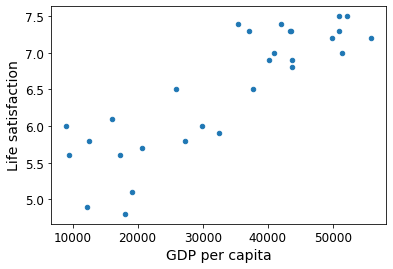

[[5.76666667]]
Score: 0.8525732853499179


In [7]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
knn.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = knn.predict(X_new)
print(y_pred) # outputs [[ 5.77]]

# Score:
score = knn.score(X,y)
print(f"Score: {score}")

## k-Nearest Neighbors model

The linear reggression model is far from the only type of model we can use in ML. The next model we try out is the k-nearest neighbor. When using Scikit-learn the model can be accessed from `sklearn.neighbors.KNeighborsRegressor`.

### Qb) Using k-Nearest Neighbors
**We have used Cyprus to predict. So if we use the k-nearest neighbor model insted of the linear regressor, what value will it predict (it should yield =5.77)?**

As seen from the output above the knn model yields 5.77

**Is the score for a k-nearest neighbor the $R^2$ as well? Can you compare scores? Is it even possible to compare any scores when doing machine learning?**

From: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor#sklearn.neighbors.KNeighborsRegressor <br>
K-nearest neighbor model also uses $R^2$ for meassuring the score. So the two models are very comparable. 

All kinds of scoring should all be directly comparable.

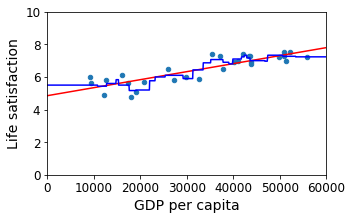

<Figure size 432x288 with 0 Axes>

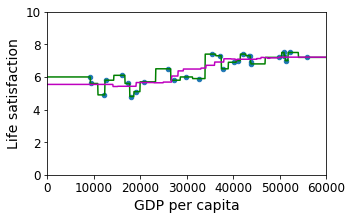

In [8]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.figure(1)
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

# TODO: add your code here..
plt.figure(2)
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

knn_low_neighbor = neighbors.KNeighborsRegressor(n_neighbors=1)
knn_low_neighbor.fit(X, y)
y_pred_knn_low_neighbor = knn_low_neighbor.predict(M)
plt.plot(m, y_pred_knn_low_neighbor, "g")

knn_high_neighbor = neighbors.KNeighborsRegressor(n_neighbors=7)
knn_high_neighbor.fit(X, y)
y_pred_knn_high_neighbor = knn_high_neighbor.predict(M)
plt.plot(m, y_pred_knn_high_neighbor, "m")

### Qc) Tuning Parameters for k-Nearest Neighbors

**If we set `k_neighbor = 1` then the model produces a `score = 1`. That seems awesome, because the score tell that the model the predict perfectly. But is it really that good?**

The nearest neighbor algorithm choses the output value based on the nearest training-data values similar to our input.<br>
Since we are measuring the score based on the same data we have trained our model with, there will always be a "perfect neighbor".
This however does **not** indicate that we have made a perfect model. If the score was measured on the test data we would receive different results.


**Explain why `k_neighbor = 1` will give such a good score for the model**

It has such a good score, because we are basing the score on the training-data and therefor there will always be an exact match.



**When the model produces a `score = 1` does this mean that it would be the prefered estimator?**

Nope not at all. The model doesn't predict anything. The output value is simply the closest value to our training-data.<br>
In a theoretical scenario where we had an infinite amount of training-data containing all possible values of x and their corresponding value of y it would be a pretty good model. But then again we wouldn't need ML if that was the case. :-)


## Neural Network

Now the goal is to try out a neural network, using the same fit-predict interface as above. We should preprocess and scale the data to get any sensible output, but at first the neural networks is fit-predicted without doing any further proprocessing or scaling of the data.

65, loss = 21076396.95604662
Iteration 166, loss = 20638710.10482106
Iteration 167, loss = 20208460.55522153
Iteration 168, loss = 19785555.81015584
Iteration 169, loss = 19369904.01668378
Iteration 170, loss = 18961413.96358430
Iteration 171, loss = 18559995.07912304
Iteration 172, loss = 18165557.42901422
Iteration 173, loss = 17778011.71457047
Iteration 174, loss = 17397269.27103464
Iteration 175, loss = 17023242.06608720
Iteration 176, loss = 16655842.69852302
Iteration 177, loss = 16294984.39709121
Iteration 178, loss = 15940581.01949181
Iteration 179, loss = 15592547.05152284
Iteration 180, loss = 15250797.60637148
Iteration 181, loss = 14915248.42404304
Iteration 182, loss = 14585815.87092120
Iteration 183, loss = 14262416.93945338
Iteration 184, loss = 13944969.24795466
Iteration 185, loss = 13633391.04052400
Iteration 186, loss = 13327601.18706646
Iteration 187, loss = 13027519.18341484
Iteration 188, loss = 12733065.15154477
Iteration 189, loss = 12444159.83987651
Iteration 1

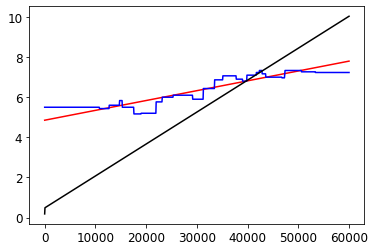

In [9]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor, can be very tricky for the tiny-data
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X,y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# TODO: add your code here..
x_cyprus = [[22587]]
y_cyprus = mlp.predict(x_cyprus)
print(f"MLP predict for Cyprus: {y_cyprus}")
score = mlp.score(X, y)
print(f"MLP Score: {score}")

### Qd) Trying Neural Network

Now we have tried to use a neural network for the ML model. The model used, is the `MLPRegressor` from Scikit-learns Multi-Layer Perceptron for regression. 

**Is it right to compare the score with the linear and KNN-scores?**

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlp#sklearn.neural_network.MLPRegressor <br>
Score returned -3.6741. It also uses $R^2$ to meassure the score, so it can be compared. The model is simply so bad that it has a negative score.

### Qe) Neural Network with pre-scaling

Now the data is scaled before training the model. We are using the interp function to scale the data from 0 to 1. 

**Is the model doing any better?**

If only the score is evaluated, then this MLP model is better with a `MLP score = 0.7254` which is significantly bad. We would still mark this model being useless. The graph below is alarming and thats makes us happy that this exercise is optional. We are not sure the the data is scaled correct.

ss = 0.10452614
Iteration 3086, loss = 0.10449723
Iteration 3087, loss = 0.10446836
Iteration 3088, loss = 0.10443954
Iteration 3089, loss = 0.10441076
Iteration 3090, loss = 0.10438202
Iteration 3091, loss = 0.10435332
Iteration 3092, loss = 0.10432467
Iteration 3093, loss = 0.10429606
Iteration 3094, loss = 0.10426750
Iteration 3095, loss = 0.10423897
Iteration 3096, loss = 0.10421049
Iteration 3097, loss = 0.10418206
Iteration 3098, loss = 0.10415366
Iteration 3099, loss = 0.10412531
Iteration 3100, loss = 0.10409701
Iteration 3101, loss = 0.10406874
Iteration 3102, loss = 0.10404052
Iteration 3103, loss = 0.10401234
Iteration 3104, loss = 0.10398421
Iteration 3105, loss = 0.10395611
Iteration 3106, loss = 0.10392806
Iteration 3107, loss = 0.10390005
Iteration 3108, loss = 0.10387209
Iteration 3109, loss = 0.10384417
Iteration 3110, loss = 0.10381629
Iteration 3111, loss = 0.10378845
Iteration 3112, loss = 0.10376066
Iteration 3113, loss = 0.10373290
Iteration 3114, loss = 0.1037051

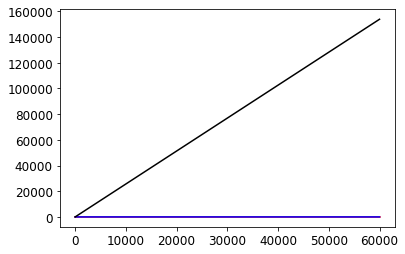

In [10]:
X = np.interp(X, (X.min(), X.max()), (0, +1))
print(X)
# Setup MLPRegressor, can be very tricky for the tiny-data
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X,y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
mld_y_pred = mlp.predict(X_new)
print(f'Prediction for Cyprus = {mld_y_pred}') # outputs [[ 5.96242338]]
print(f'MLP score = {mlp.score(X, y)}')

# L01: Modules and Classes

L01: Modules and Classes consisted of getting familiar with Python and learning how to use modules and classes.<br>
During the exercise we will be writing our own module and classes.

### Qa:

For this part of the assignment we will be using the module `libitmal` which is provided as part of the course.<br>
It is assumed that the module directory has been successfully added to the `PYTHONPATH`. On Linux this can be done by running `export PYTHONPATH="<module-dir>:$PYTHONPATH"`. If a `venv` is being used this can be added to the `activate` script.

The assignment consisted of running the `utils.TestAll()` function from the `libitmal` library. The function has been successfully ran below.

In [11]:

from libitmal import utils
utils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


### Qb:

In this exercise a new module had to be created with dummy functionality.<br>
This was achieved by creating a new folder called `libdummymodule`, adding an empty `__init__.py` file. This module was added to the `PYTHONPATH` like in exercise Qa.<br>
An extra file called `hello_world` was made which included a function: `hello_world(number)`. From the docstring of the function it can be read that the function prints "Hello, World!" `number` amount of times.

The function is tested below.

In [12]:
from libdummymodule.hello_world import hello_world
hello_world(2)

Hello, World!
Hello, World!


### Qc:

Jupyter does not recompile the modules every time it is used in a cell-code. Instead it uses a cached version of it. Question c asked how one can force a recompilation of a module for situations where the module had been changed.

The method we found the easiest was to simply restart the Jupyter kernel by pressing the restart symbol in the top menu. However, there are also some "magic lines" that ships with IPython¹ that can be used to reload a given module when a code cell is ran.


-------------------
¹ IPython is a dependency that Jupyter ships with.

### Qd (OPTIONAL):

Question d asked to write a small how-to guide on how moduels in Python works.

1. Make sure the path you're creating the module in is in your `$PYTHONPATH`
    * If using a venv you can add `export PYTHONPATH="<module-dir>":$PYTHONPATH` at the bottom of your .venv/activate file.
1. Create the folder and an empty file called __init__.py
1. Write your files.


### Qe:

The first part of question e consisted on answering some concrete questions:

*How are private function and member variables represented in python classes?*<br>
Private does not exist in Python. Instead there is a convention of adding `__` as a prefix of the method or member variable. If trying to access a method or member variable prefixed with `__` an `AttributeError` will be raised.

*What is the meaning of `self` in python classes?* <br>
It's a reference to the specific instance of the class. Comparable to the `this` pointer in C++.

*What happens to a function inside a class if you forget `self` in the parameter list, like `def myfun():` instead of `def myfun(self):` and you try to call it like `myobjectx.myfun()`? Remember to document the demo code and result.* <br>
It becomes a static function. See `my_static_fun()` below.

The second part consisted of extending a very simple class with some extra functionality. Some private and public members and functions had to be added.


In [13]:
class MyClass:
    myvar = "blah"
    __priv_var = "I can't stop you from using this var, but you probably shouldn't."

    def __priv_fun(self):
        print("I can't stop you from using this function, but you probably shouldn't.")

    def fun(self):
        print("This is a message inside the class.")

    def static_fun():
        print("I cannot be called from an instantiated object.")

    def get_priv_var(self):
        return MyClass.__priv_var

myobjectx = MyClass() # Making new obj
myobjectx.fun() # Calling member function

try:
    myobjectx.static_fun() # Trying to call static func on instantiated object raises error
except TypeError as e:
    print(f"TypeError: {e}")

MyClass.static_fun() # Calling static func correctly.

print(myobjectx.myvar) # printing public object

try:
    print(myobjectx.__priv_var) # Trying to print private member variable raises error
except AttributeError as e:
    print(f"AttributeError: {e}")

print(myobjectx.get_priv_var()) # Getting a private member variable.

try:
    myobjectx.__priv_fun() # Trying to call private func raises error
except AttributeError as e:
    print(f"AttributeError: {e}")


This is a message inside the class.
TypeError: static_fun() takes 0 positional arguments but 1 was given
I cannot be called from an instantiated object.
blah
AttributeError: 'MyClass' object has no attribute '__priv_var'
I can't stop you from using this var, but you probably shouldn't.
AttributeError: 'MyClass' object has no attribute '__priv_fun'


### Qf:
For this exercise the class from exercise Qe will be extended further. A constructor will be added. See the code cell below.

The exercise also asks whether or not destructors exist in Python and what purpose they might have.<br>
In Python the destructors do exist but are not used as much as in C++. In C++ destructors are usually used for de-allocating dynamically allocated memory. Pythons garbage collection handles this automatically. It is however possible to specify a `__del__` function to add destructor functionality, but it is not as widely used.


In [14]:
class MyBetterClass(MyClass): # Extending the class (inheritance)
    def __init__(self):
        print("I now have a CTOR!!!")

my_better_object = MyBetterClass()

I now have a CTOR!!!


### Qg:

This exercise asks to extend the class even further by adding a `to_string` functionality to our class as it is known in C++ and C#. This is done through the `__str__` function. Se code cell below.

In [15]:
class EvenBetterClass(MyBetterClass):
    def __str__(self): # String representation. 
        return "I am the string representation of an even better class!"

my_even_better_object = EvenBetterClass()
print(my_even_better_object)

I now have a CTOR!!!
I am the string representation of an even better class!


# L02: Cost function

$$
  \newcommand\norm[1]{{\cal L}_{#1}}
$$

## Qa Construct and print matrix $\mathbf X$ for the given rows.

In [16]:
import numpy as np

y = np.array([1,2,3,4]) # NOTE:  you'll need this later

X = np.array([[1, 2, 3], [4, 2, 1], [3, 8, 5], [-9, -1, 0]])

print('Matrix X:')
print(X)

Matrix X:
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


## Qb Create a Python implementation of norms $\norm{1}$ and $\norm{2}$.
### a) The implementations of $\norm{1}$ and $\norm{2}$ may only use 'low-level' operators. And test your implementation against a built-in function.

In [17]:
import numpy as np

def L1(vector):
    valid_types = (list, np.ndarray)
    if not isinstance(vector, valid_types):
        raise ValueError('input must be list or np.array')

    s = 0
    for i in vector:
        if isinstance(i, valid_types):
            raise ValueError('N-dimensional arrays not supported')

        s += ((i) ** 2) ** 0.5
    return s

def L2(vector):
    valid_types = (list, np.ndarray)
    if not isinstance(vector, valid_types):
        raise ValueError('input must be list or np.array')

    s = 0
    for i in vector:
        if isinstance(i, valid_types):
            raise ValueError('N-dimensional arrays not supported')
        
        s += (i ** 2)
    return s ** 0.5

tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1 = np.linalg.norm(tx-ty, ord=1)
expected_d2 = np.linalg.norm(tx-ty, ord=2)

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9
assert np.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert np.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print('OK')

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK


### b) Create a pythonic implementation of $\norm{2}$ that uses numpy's dot method.

In [18]:
def L2Dot(vector):
    if not isinstance(vector, (list, np.ndarray)):
        raise ValueError('input must be list or np.array')

    s = np.dot(vector, vector)
    return np.sqrt(s)

d2dot = L2Dot(tx-ty)
print("d2dot-expected_d2=", d2dot-expected_d2)
assert np.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 

print('OK')

d2dot-expected_d2= 0.0
OK


## Qc Implement a Root Mean Squre Error (RMSE) function and test it.
Implement a RMSE fuction using low level operations. 

In [19]:
def RMSE(h, y):
    if len(h) != len(y):
        raise ValueError('Vectors must be same length')
    
    if not isinstance(h, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')

    if not isinstance(y, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')

    return L2(h-y) * (1 / len(h)) ** 0.5

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert np.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print('OK')

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


## Qd Implement a Mean Absolute (MAE) function and test it.

In [44]:
def MAE(h, y):
    if len(h) != len(y):
        raise ValueError('Vectors must be same length')
    
    if not isinstance(h, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')

    if not isinstance(y, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')
    return 1 / len(h) * L1(h-y)

r = MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert np.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print('OK')

MAE=3.75, diff=0.0
OK


## Qe Add error handling to your functions.

Error handling has been added to all function checking the input type and size.

## Qf Conclusion on the ML concepts used in this exercise.

We have in this exercise worked with different norms which are used in cost functions. We have gained insights in the functions inner workings by implementing them using “low-level” operators in Python. 
<br> <br>
After implementing $\norm{1}$ and $\norm{2}$ we used them to create MAE and RMSE cost functions, this taught us about the relationship between norms and cost functions and the math behind them. This granted us insight in when to use which function in feature ML-exercises.
<br> <br>
Lastly, we tried out implementing error handling to write more robust Python code. This will help us down the road catching errors before executing code with long run time.


# L02: Dummy classifier

## Qa Load the MNIST dataset and disply a number.

Max value in X is 0 255.0
Max value in X after scaling is 0 1.0


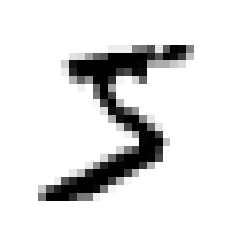

In [45]:
from sklearn.datasets import fetch_openml
from pandas import DataFrame
import numpy as np

X, y = fetch_openml('mnist_784', return_X_y=True)
if(type(X) == type(DataFrame())):
    X = X.to_numpy()
    y = y.to_numpy()
print(f"Max value in X is {0}", np.max(X))

X = X / 255
print(f"Max value in X after scaling is {0}", np.max(X))

def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

MNIST_PlotDigit(X[0])

## Qb Create a Stochastic Gradient Decent Classifier
### a) Split the dataset into testing and traning sets. And train and test the model.

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

ground_true = (y == '5') 
X_train, X_test, y_train, y_test = train_test_split(X, ground_true, test_size=0.33, random_state=1)

clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(f'SGD Classifier score: {score}')

SGD Classifier score: 0.9737662337662337


### b) Plot a number that has been correctly categorized and one that has not.

Model prediction, is this the number 5?
SGD anwser: True


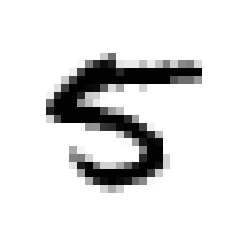

In [57]:
pred = clf.predict(X_test)

# Correct classified
MNIST_PlotDigit(X_test[3])
print(f'Model prediction, is this the number 5?\nSGD anwser: {pred[3]}')

Model prediction, is this the number 5?
SGD anwser: True


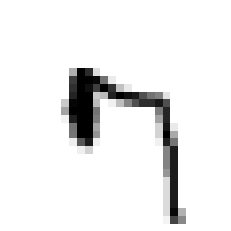

In [58]:
# Misclassified 
misclassified = np.where(y_test != pred)
MNIST_PlotDigit(X_test[misclassified[0][0]])
print(f'Model prediction, is this the number 5?\nSGD anwser: {pred[misclassified[0][0]]}')

## Qc Dummy binary classifier implementation 
### a) Create a Dummy binary classifier that inherits from BaseEstimator and ClassifierMixin from Scikit-learn.

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return [False for _ in range(len(X))]

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)

### b) Compare the accuracy score to the DummyClassifier from [HOML] p. 89, how do they compare?

In [60]:
dc = DummyClassifier()
dc.fit(X_test, y_test)
s = dc.score(X_test, y_test)
print(f'DummyClassifier socre: {s}')

DummyClassifier socre: 0.9085281385281385


In [HOML] the score is between 0.907 - 0.912, which is very similar to our score. The difference can be related to the randomness when dividing the data into folds.

## Qd Conclusion Conclude the most important ML-concepts you learned in this exercise.
This exercise taught us how to import open-source datasets and splitting them in training and test folds for ML development. We were also granted insight in how to create a classifier class to use with the rest of the Scikit-learn module. 
<br> <br>
This exercise also taught us that it is important to know if your data set is skewed. Because it can lead to false hope when testing your model. This was the case when trying to create a binary classifier on the MNST dataset because it contains an even number of pictures for each number. This was the reason why our DummyClassifier god a good score by always predicting false. 



# L02: Performance metrics

In this chapter we are looking at different metrics used in Machine Learning. These metrics can be called performance metric, but performance score could be a better name to capture the understanding. The metrics we will discover in this chapter is as following:

#### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

#### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

#### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### F-score

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$

#### Confusion Matrix

The confusion matrix can give a readable matrix which shows the performance of the model divided into 'actual' and 'predicted' dimensions. The following figures shows the structure of the confusion matrix.

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

If the data contain more classes, then the confusion matrix are still able to handle it. The matrix are just expanded by **N** actual classes and **N** predicted classes. 

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$

### Qa) Implement accuracy function and test

In the following code sections we are implementing the accuracy function from scratch. Then it's compared to the accuracy function from Scikit-learn imported from `sklearn.metrics`. The functions will be tested on the MNIST data, which is drawed digit from 0-9.

By comparing our own accuracy function with Scikit-learns implementation it happens that the result are equal, therefor MyAccuracy must work as supposed.

In [11]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# ----------------------SGD-------------------------
X, y = fetch_openml('mnist_784', return_X_y=True)
X = X / 255

ground_true = (y == '5')
X_train, X_test, y_train, y_test = train_test_split(X, ground_true, test_size=0.33, random_state=1)

clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)

y_pred = clf.predict(X_test)

# --------------------DUMMY-------------------------
from sklearn.base import BaseEstimator, ClassifierMixin

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return [False for _ in range(len(X))]

dc = DummyClassifier()
dc.fit(X_test, y_test)

y_predDC = dc.predict(X_test)

0.973030303030303


In [12]:
from sklearn.metrics import accuracy_score
from numpy import fabs

# Accuracy function from scratch
def MyAccuracy(y_true, y_pred, normalize=True):
    score = 0
    for yt,yp in zip(y_true, y_pred):
        if yt == yp:
            score += 1
    return score / len(y_true) if normalize else score
    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

    # do some numerical comparison here, like
    eps = 1E-9
    assert fabs(a0-a1)<eps, "MyAccuracy precission error"
        

TestAccuracy(y_test, y_pred)
TestAccuracy(y_test, y_predDC)


my a          =0.973030303030303
scikit-learn a=0.973030303030303

my a          =0.9085281385281385
scikit-learn a=0.9085281385281385


### Qb) Implement Precision, Recall and $F_1$-score and test

The approch of the exercise is quite similar to Qa. We implement the function to calculate precision, recall and the $F_1$-score from scratch and compare them to Scikit-learns similar functions. 

Our implemented function gives equal results to Scikit-learns functions.

To avoid dividing with zero, an if-statement simply check is it's dividing with zero. It seams like Scikit-learns functions are returning zero  when the denominator is zero as well. 

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

def MyPrecision(y_true, y_pred):
    TP_FP = 0
    TP = 0
    for yt, yp in zip(y_true, y_pred):
        if yp:
            if yt == yp:
                TP += 1
            TP_FP += 1
    return TP/TP_FP if TP_FP != 0 else 0

def MyRecall(y_true, y_pred):
    TP = 0
    FN = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp and yp:
            TP += 1
        if yt != yp and yt:
            FN += 1
    return TP/(FN+TP)
    
def MyF1Score(y_true, y_pred):
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print("Precision SGD:")
print(MyPrecision(y_test, y_pred))
print(precision_score(y_test, y_pred))
print("Recall SGD:")
print(recall_score(y_test, y_pred))
print(MyRecall(y_test, y_pred))
print("F1 Score SGD:")
print(MyF1Score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print()
print("Precision Dummy Classifier:")
print(MyPrecision(y_test, y_predDC))
print(precision_score(y_test, y_predDC))
print("Recall Dummy Classifier:")
print(recall_score(y_test, y_predDC))
print(MyRecall(y_test, y_predDC))
print("F1 Score Dummy Classifier:")
print(MyF1Score(y_test, y_predDC))
print(f1_score(y_test, y_predDC))

Precision SGD:
0.8568007662835249
0.8568007662835249
Recall SGD:
0.8466635115948887
0.8466635115948887
F1 Score SGD:
0.8517019757200667
0.8517019757200667

Precision Dummy Classifier:
0
0.0
Recall Dummy Classifier:
0.0
0.0
F1 Score Dummy Classifier:
0
0.0


### Qc) The Confusion Matrix

Now by importing `sklearn.metrics.confusion_matrix` we can make the confusion matrix for the the earlier used Dummy and SGD classifiers. 

The printout for the code section below shows how the confusion matrix are organized. This is shown here in the following figure. 

$$   
{\bf M}\st{confusion} = 
\begin{array}{|l|ll|}
    \hline
    TN & FP \\\hline  
    FN & TP \\\hline
\end{array}
$$

If the parameters is changed when calling `confusion_matrix`, it can be seen that FP and FN has changed places. It depends on your system if this change is critical.

In [14]:
from sklearn.metrics import confusion_matrix

M_dummy = confusion_matrix(y_test, y_predDC)
M_SDGwrong = confusion_matrix(y_pred, y_test)
M_SDG = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Dummy:")
print(M_dummy)
print()
print("SDG Wrong:")
print(M_SDGwrong)
print()
print("SDG:")
print(M_SDG)
print()
print("TN: " + str(tn))
print("FP: " + str(fp))
print("FN: " + str(fn))
print("TP: " + str(tp))

Dummy:
[[20987     0]
 [ 2113     0]]

SDG Wrong:
[[20688   324]
 [  299  1789]]

SDG:
[[20688   299]
 [  324  1789]]

TN: 20688
FP: 299
FN: 324
TP: 1789


### Qd) Confusion Matrix Heat-map

This heat-map is a way to visualize the confusion matrix. To make the heat-map inspiration is found in [HOML].

The data is normalized to give a heat-map which is easier to read. If not normalized, the lower values as in FP, FN and TP will barely have a different color because of TN which is significantly larger than the others. 

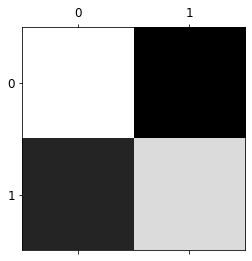

White displays high values and black displays low values
The Matrit is normalized

[True Negative]		[False Positive]
[False Negative]	[True Positve]


In [15]:
import matplotlib.pyplot as plt

row_sums = M_SDG.sum(axis=1, keepdims=True)
norm_M_SDG = M_SDG / row_sums

plt.matshow(norm_M_SDG, cmap = plt.cm.gray)
plt.show()

print("White displays high values and black displays low values")
print("The Matrit is normalized")
print()
print("[True Negative]\t\t[False Positive]")
print("[False Negative]\t[True Positve]")

### Qe) Conclusion

We have tried to make functions to calculate performance scores by ourself and how the scores shows how well the model performs. We have gained insight in how confusion matrix works and how we can apply it in futures models. We have learned that the confusion matrix will easily show the nomenclatures of the model.

# L03: Pipelines

L03: Pipelines consisted of learning how preprocessing data for certain ML models can be necessary and how to use pipelines in Sklearn.

The introduction of L03: Pipelines consisted of a lot of information and some code snippets. This has been left out of this notebook.

The code cell below imports numpy and matplotlib. It also loads the pickle file `itmal_l01_data.pkl`, which contains the OECD data from L01: Intro.

In [7]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def LoadDataFromL01():
    import pickle
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


The code cell below will define the function `PlotModels` that will be used later in the exercise. It will also make an `MLPRegressor` (Multi-layer Perceptron regressor) which will have a terrible score because the data data has not been been preprocessed.

The MLP mis-fits the data, seen in the bad R^2 score..
lin.reg.score(X, y)=0.73
MLP.score(X, y)=-6.66
OK


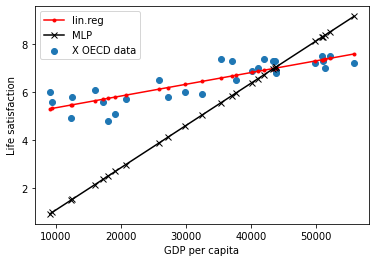

In [8]:
# Setup the MLP and lin. regression again..

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

def PlotModels(model1, model2, X, y, name_model1="lin.reg", name_model2="MLP"):

    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2

    y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(
        model1, model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    print(f"{name_model1}.score(X, y)={score_model1:0.2f}")
    print(f"{name_model2}.score(X, y)={score_model2:0.2f}")


# lets make a linear and MLP regressor and redo the plots

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP mis-fits the data, seen in the bad R^2 score..")
PlotModels(linreg, mlp, X, y)

print("OK")

### Qa:

The first exercise consisted of implementing a custom version of the `MinMaxScaler` that has the same functionality but is done "manually". Our MinMaxScaler can be seen below, where it is also tested against the `MinMaxScaler` that ships with Sklearn.

From the code cell below it can be seen that our MinMaxScaler first checks that the input `v` is either a `list` or a `numpy.array`. Then it gets the minimum and maximum values from `v` and stores them in `min` and `max`. A new `list` is then generated that has been scaled based on the minimum and maximum. This is by iterating over `v` and by subtracting `min` from every `item`. This value is then divided by `max-min` and appended to the new vector `v_new`, which will be returned.

The small test at the bottom of the cell confirms that the functionality is practically identical, since the statement `fabs(myMinMaxS[i]-sklearnMinMaxS[i])<eps` never returns `True`. The statement `fabs(myMinMaxS[i]-sklearnMinMaxS[i])<eps` checks if the values differ between our MinMaxScaler and Sklearn's MinMaxScaler.


In [9]:
from sklearn.preprocessing import MinMaxScaler
from numpy import fabs

def MyMinMaxScaler(v):
    if isinstance(v, (type(list), type(np.array))):
        raise TypeError('input must be list or np.array')
    min = np.min(v)
    max = np.max(v)
    v_new = []
    for item in v:
        v_new.append((item-min)/(max-min))
    return v_new

scaler = MinMaxScaler()
scaler.fit(X)
sklearnMinMaxS = scaler.transform(X)
myMinMaxS = MyMinMaxScaler(X)

eps = 1E-9
for i in range(len(X)):
    assert fabs(myMinMaxS[i]-sklearnMinMaxS[i])<eps, f"Diff between myMinMaxS and sklearnMinMaxS: myMinMaxS[{i}]: {myMinMaxS[i]}, sklearnMinMaxS[{i}]: {sklearnMinMaxS[i]}"

print("OK")


OK


### Qb:

In this exercise `Pipeline` was introduced. A pipeline had to be created, which scaled the data from X and then trained the `MLPRegressor` from the introduction. As a bonus the newly trained model was drawn.

From the results of the code cell below it can be seen that the MLP model scores much better when the data is scaled. (Compared to the other MLP data from the introduction)

Pipe (MLP scaled).score(X, y)=0.72
Linreg.score(X, y)=0.73


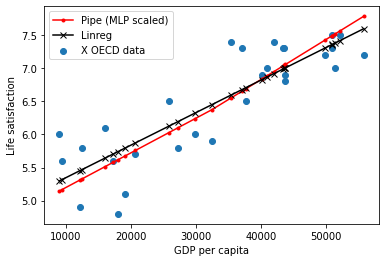

In [10]:
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('mlp', mlp)
])

pipe.fit(X,y)
PlotModels(pipe, linreg, X, y, name_model1="Pipe (MLP scaled)", name_model2="Linreg")

### Qc:

In this exercise the `MinMaxScaler` were to be compared to the `StandardScaler`. The results were to be compared to each other with outliers in mind.

A comparison of the results can be seen below the code cell.

Pipe1 (MLP, MinMax Scaled).score(X, y)=0.72
Pipe2 (MLP, StandardScaler).score(X, y)=0.77
Max in X: 55805.204000000005
Min in X: 9054.914
Mean in X: 33391.74913793103
Std in X: 14395.272687078264
 
2*Std+mean in X: 62182.29451208756
2*Std-mean in X: 4601.203763774502


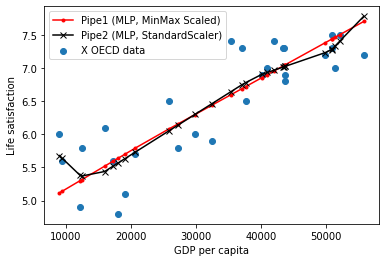

In [11]:
from sklearn.preprocessing import StandardScaler

mlp2 = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp2)
])
pipe.fit(X,y)
pipe2.fit(X,y)


PlotModels(pipe, pipe2, X, y, name_model1="Pipe1 (MLP, MinMax Scaled)", name_model2="Pipe2 (MLP, StandardScaler)")

print(f"Max in X: {X.max()}")
print(f"Min in X: {X.min()}")
print(f"Mean in X: {X.mean()}")
print(f"Std in X: {X.std()}")
print(" ")
print(f"2*Std+mean in X: {2*X.std()+X.mean()}")
print(f"2*Std-mean in X: {-2*X.std()+X.mean()}")

### Qc continued:

There is a fundamental problem with mix-max scalers. The problem is that the scale will be heavily affected by outliers in cases where the outlier is significantly larger or smaller than the majority of the data-points.

After consulting lecturer "Henrik Daniel Kjeldsen" we were given a more statistical approach to determining whether there were outliers in the dataset.

In the code cell above it can be seen that the mean in X is $\approx33000$ and standard deviation of $\approx14000$. A general rule of thumb is to categorize an outlier as a data-point with values between $\pm2\cdot\sigma+\mu$, which is values between $\approx62000$ and $\approx4600$. Since the maximum and minimum is between these values it means that we do not have any significant outliers in the dataset.

To back up the point it can be seen from the scores that the models perform nearly identically. Pipe1 has a score $\approx0.72$ and Pipe2 has a score $\approx0.71$.

### Qd:

For the last exercise in L03: Pipelines the hyperparameters of the `MLPRegressor` were to be changed.

The code cell below simply creates an `MLPRegressor` similar to the one from exercise Qc. This will be the base model the future models will be compared to.

In [12]:
from sklearn.model_selection import train_test_split

X, y = LoadDataFromL01() # Reload data to be sure
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

mlp_og = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe_og = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp_og', mlp_og)
])

pipe_og.fit(X_train, y_train)
print("OK")


OK


### Qd continued:

In the code cell below the parameter `hidden_layer_sizes` has been changed to 4 neurons instead of 10 and in the cell on step further down from 10 to 100.<br>
In the code cell where the amount of neurons has been reduced the score was 0.03 points lower than the base.<br>
In the code cell where the amount of neurons has been increased the score was 0.01 points lower than the base.

The results were quite surprising, since the amount of neurons seem to affect the score marginally compared to the groups expectations. It was also surprising that 100 neurons did not improve the performance.

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.77


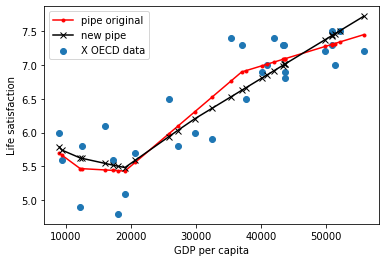

In [25]:
# hidden_layer = 2

mlp = MLPRegressor(hidden_layer_sizes=(4, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.80


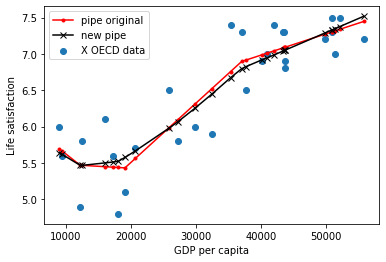

In [21]:
# hidden_layer = 100

mlp = MLPRegressor(hidden_layer_sizes=(100, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")

### Qd continued:

In the code cell below the attribute `solver` has been changed to `sgd`. The solver indicates the loss function the model uses to calculate the loss when training. `sgd` is a stochastic gradiant descent.<br>
In the code cell one step further below the solver has been changed to `lbfgs`, which is another function for meassuring the loss function.

By running the code cells below it can be seen that changing the the loss function to `sdg` results in a score reduction of 0.08 points and changing to `lbfgs` did not result in a change.

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.73


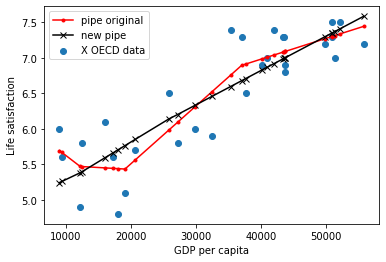

In [34]:
# hidden_layer = 10, solver = 'sgd' (stochastic gradiant descent)

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='sgd',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.81


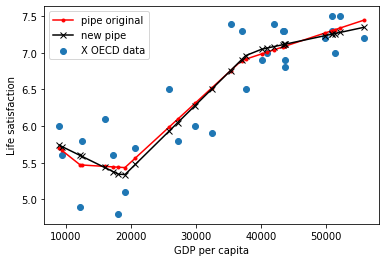

In [35]:
# hidden_layer = 10, solver = 'lbfgs' (stochastic gradiant descent)

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='lbfgs',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")

### Qd continued:

In the code cell below the activation function has been changed to `identity`. This results in a score change of 0.08 points.

pipe original.score(X, y)=0.81
new pipe.score(X, y)=0.73


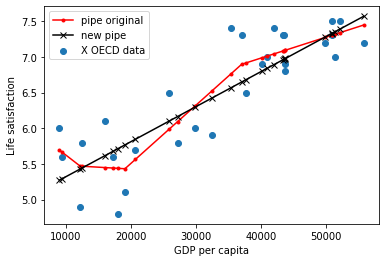

In [37]:
# hidden_layer = 10, activation='identity'

mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='identity',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipe.fit(X, y)

PlotModels(pipe_og, pipe, X, y, name_model1="pipe original", name_model2="new pipe")